In [78]:
import numpy as np
from numba import jit
import pandas as pd
from sympy import *

import matplotlib.pyplot as plt

In [98]:
def pythag(M):
    l = []
    for m in np.arange(1,M):
        for n in np.arange(1,m):
            if (m**2 + n**2 <= M):
                t_list = [m*m - n*n, 2*m*n, m*m + n*n]
                t_list.sort()
                t = np.array(t_list)
                l.append(t)
                theta = min([np.floor(M/x) for x in t])
                for i in np.arange(1, theta+1):
                    l.append(i*t)
    
    return l

M = 10000
z_df = pd.DataFrame(pythag(M), columns=["a","b","c"])
z_df.sort_values(by=["a","b"], inplace=True)
z_df.drop_duplicates(inplace=True)
z_df.reset_index(inplace=True, drop=True)
z_df = z_df.astype(int)
z_df["p"] = z_df["a"] + z_df["b"] + z_df["c"]

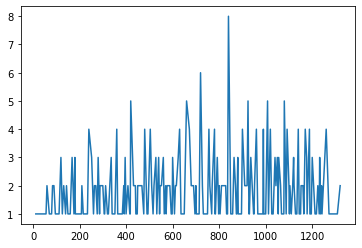

In [80]:
plt.plot(z_df.groupby("p").apply(lambda x:x.shape[0]))

In [101]:
y_df = z_df.groupby("p").apply(lambda x:x.shape[0]).to_frame()
y_df.reset_index(inplace=True)
y_df.rename(columns={0:"cnt"}, inplace=True)
y_df = y_df.loc[y_df.p<=1000]
y_df.loc[y_df.cnt==max(y_df.cnt)]

,p,cnt
154,840,8
